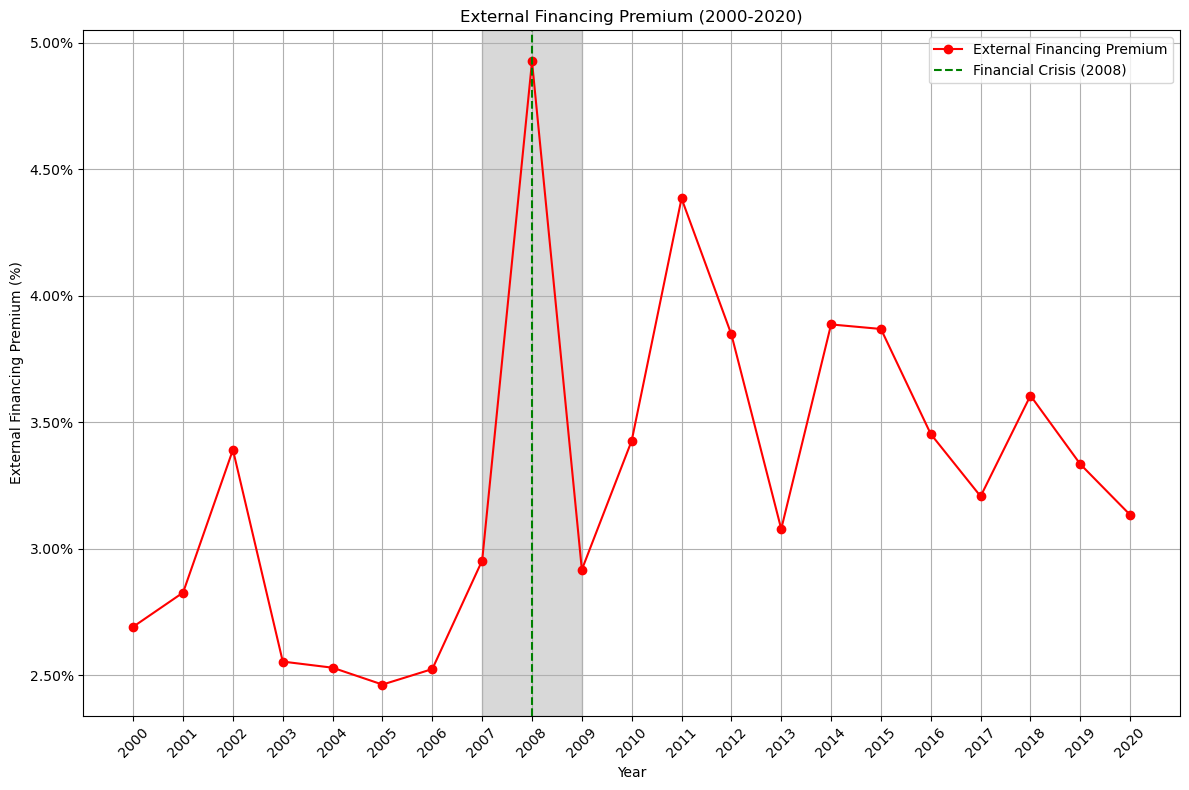

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取Excel文件
data_filtered = pd.read_excel('Book1.xlsx')  # 确保文件名和路径正确

# 过滤2000到2020年的数据
data_filtered = data_filtered[(data_filtered['Year'] >= 2000) & (data_filtered['Year'] <= 2020)][['Year', 'Implied ERP (FCFE)', 'Bond Premuim']]

# 假设股权和债权各占50%，计算外部融资溢价（EFP）
# 此处使用 "Bond Premium" 列作为债务融资溢价（DFS）
data_filtered['EFP'] = 0.5 * data_filtered['Implied ERP (FCFE)'] + 0.5 * data_filtered['Bond Premuim']
data_filtered['EFP %'] = data_filtered['EFP'] * 100  # 转换为百分比

# 绘图
plt.figure(figsize=(12, 8))
plt.plot(data_filtered['Year'], data_filtered['EFP %'], marker='o', linestyle='-', color='r', label='External Financing Premium')
plt.axvline(x=2008, color='Green', linestyle='--', label='Financial Crisis (2008)')

plt.title('External Financing Premium (2000-2020)')
plt.xlabel('Year')
plt.ylabel('External Financing Premium (%)')
plt.legend()
plt.grid(True)
plt.xticks(data_filtered['Year'], rotation=45)
plt.axvspan(2007, 2009, color='grey', alpha=0.3, label='Financial Crisis (2007-2009)')

# 设置y轴格式为百分比
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

plt.tight_layout()  # 调整布局以避免标签被切断

plt.show()



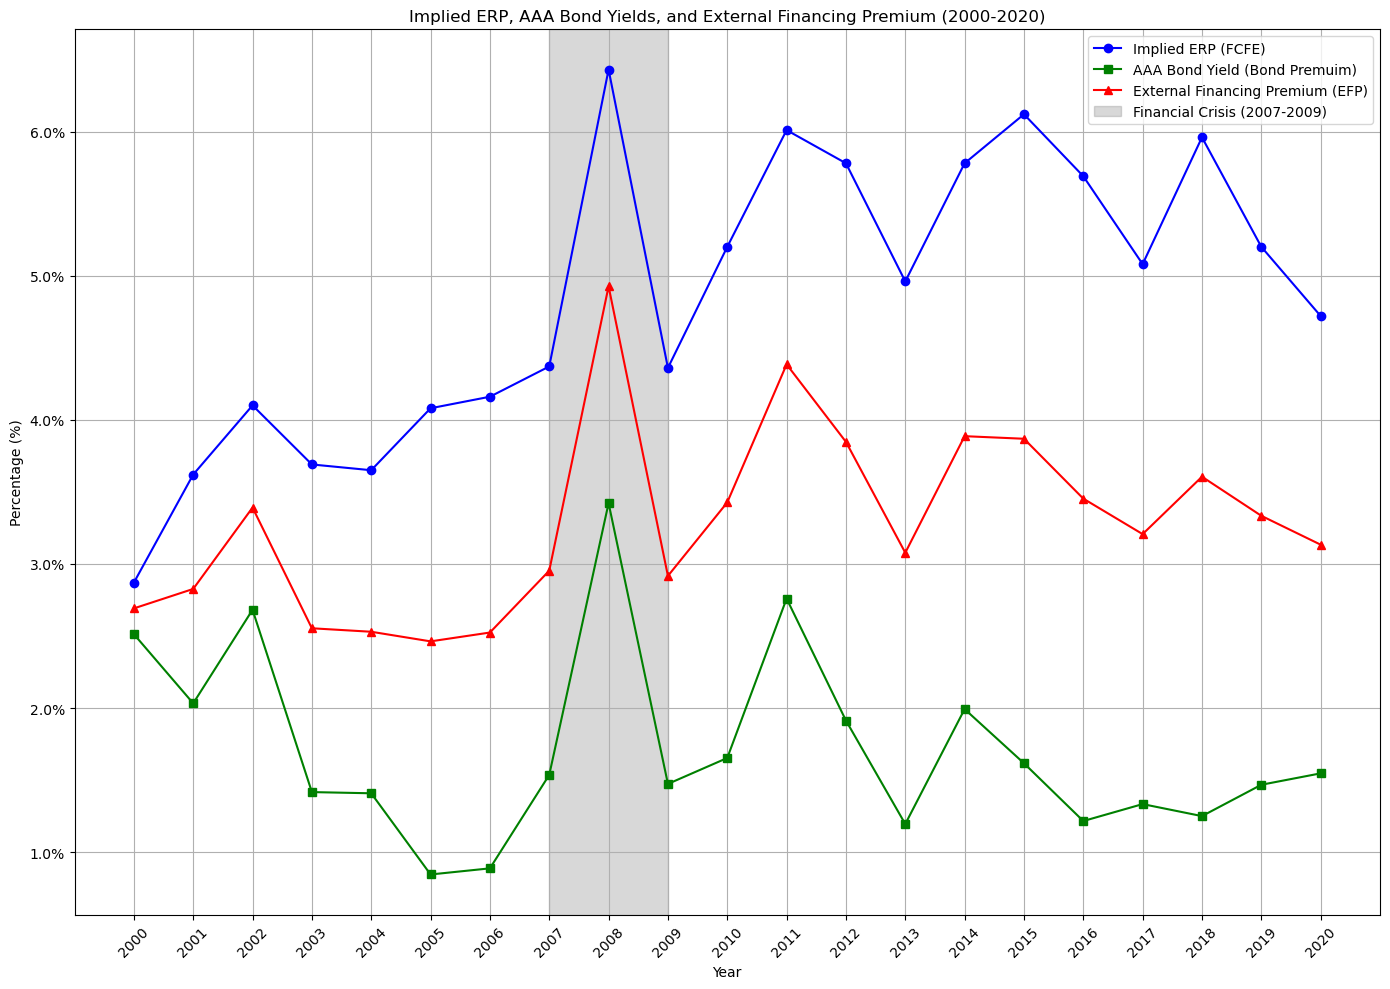

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# 重新读取Excel文件，确保使用了正确的列名
data_filtered = pd.read_excel('Book1.xlsx')  # 确保文件名和路径正确

# 过滤2000到2020年的数据
data_filtered = data_filtered[(data_filtered['Year'] >= 2000) & (data_filtered['Year'] <= 2020)][['Year', 'Implied ERP (FCFE)', 'Bond Premuim']]

# 假设股权和债权各占50%，计算外部融资溢价（EFP）
# 使用 "Bond Premuim" 列作为债务融资溢价（DFS）
data_filtered['EFP'] = 0.5 * data_filtered['Implied ERP (FCFE)'] + 0.5 * data_filtered['Bond Premuim']
data_filtered['EFP %'] = data_filtered['EFP'] * 100  # 转换为百分比

# 将Implied ERP和Bond Premuim也转换为百分比形式
data_filtered['Implied ERP (FCFE) %'] = data_filtered['Implied ERP (FCFE)'] * 100
data_filtered['Bond Premuim %'] = data_filtered['Bond Premuim'] * 100

# 绘制Implied ERP, Bond Premuim 和EFP
plt.figure(figsize=(14, 10))

plt.plot(data_filtered['Year'], data_filtered['Implied ERP (FCFE) %'], marker='o', linestyle='-', color='blue', label='Implied ERP (FCFE)')
plt.plot(data_filtered['Year'], data_filtered['Bond Premuim %'], marker='s', linestyle='-', color='green', label='AAA Bond Yield (Bond Premuim)')
plt.plot(data_filtered['Year'], data_filtered['EFP %'], marker='^', linestyle='-', color='red', label='External Financing Premium (EFP)')

# 使用阴影标出金融危机期间
plt.axvspan(2007, 2009, color='grey', alpha=0.3, label='Financial Crisis (2007-2009)')

plt.title('Implied ERP, AAA Bond Yields, and External Financing Premium (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.xticks(data_filtered['Year'], rotation=45)

# 设置y轴格式为百分比
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())

plt.tight_layout()  # 调整布局以避免标签被切断
plt.show()


In [7]:
import pandas as pd 
df_fedfund = pd.read_csv("MFF.csv")
df_fedfund.shape
print(df_fedfund)
print(df_fedfund.columns)




          DATE       DFF
0   2005-02-01  2.501786
1   2005-03-01  2.629032
2   2005-04-01  2.785000
3   2005-05-01  3.002581
4   2005-06-01  3.035667
..         ...       ...
91  2012-09-01  0.144333
92  2012-10-01  0.158387
93  2012-11-01  0.160667
94  2012-12-01  0.164516
95  2013-01-01  0.142581

[96 rows x 2 columns]
Index(['DATE', 'DFF'], dtype='object')


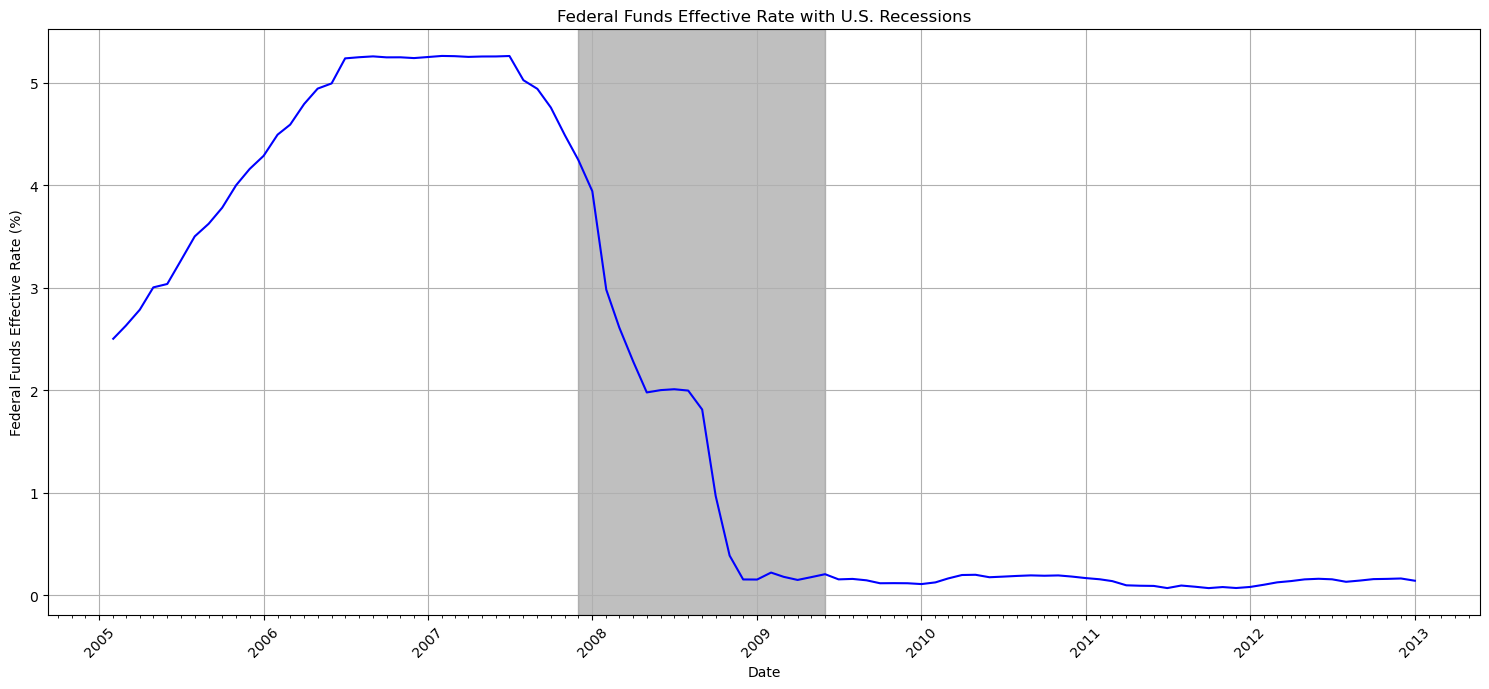

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# 假设 df_fedfund 是您的数据集，并且已正确加载
df_fedfund['DATE'] = pd.to_datetime(df_fedfund['DATE'])
df_fedfund.set_index('DATE', inplace=True)

# 创建图表
plt.figure(figsize=(15, 7))
plt.plot(df_fedfund.index, df_fedfund['DFF'], marker='', linestyle='-', color='blue')

# 添加经济衰退期的阴影，此处只是示例，您需要替换为实际的衰退期日期
recessions = [
    (pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01')),
    # ... 添加更多衰退期
]
for start, end in recessions:
    plt.axvspan(start, end, color='grey', alpha=0.5)

# 设置日期格式
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())


# 设置标签和标题
plt.xlabel('Date')
plt.ylabel('Federal Funds Effective Rate (%)')
plt.title('Federal Funds Effective Rate with U.S. Recessions')

# 显示网格
plt.grid(True)

# 旋转日期标签
plt.xticks(rotation=45)

# 显示图表
plt.tight_layout()
plt.show()




In [11]:
import pandas as pd
DF_FUP=pd.read_csv('MFTDUP - Copy.csv')
DF_FLow=pd.read_csv('MTDLOW.csv')
DF_FDD= pd.read_csv('MFF2008-2018.csv')
print(DF_FUP)
print(DF_FLow)


           DATE  DFEDTARU
0    2009-01-01  0.250000
1    2009-02-01  0.250000
2    2009-03-01  0.250000
3    2009-04-01  0.250000
4    2009-05-01  0.250000
..          ...       ...
104  2017-09-01  1.250000
105  2017-10-01  1.250000
106  2017-11-01  1.250000
107  2017-12-01  1.395161
108  2018-01-01  1.500000

[109 rows x 2 columns]
           DATE  DFEDTARL
0    2009-01-01  0.000000
1    2009-02-01  0.000000
2    2009-03-01  0.000000
3    2009-04-01  0.000000
4    2009-05-01  0.000000
..          ...       ...
104  2017-09-01  1.000000
105  2017-10-01  1.000000
106  2017-11-01  1.000000
107  2017-12-01  1.145161
108  2018-01-01  1.250000

[109 rows x 2 columns]
           DATE       DFF
0    2005-01-01  2.279355
1    2005-02-01  2.501786
2    2005-03-01  2.629032
3    2005-04-01  2.785000
4    2005-05-01  3.002581
..          ...       ...
153  2017-10-01  1.153871
154  2017-11-01  1.157000
155  2017-12-01  1.301613
156  2018-01-01  1.414516
157  2018-02-01  1.417500

[158 rows x 2 c

In [19]:
print(DF_FDD)
print(DF_FDD.columns)
print(DF_FUP.columns)
print(DF_FLow.columns)


                 DFF
DATE                
2005-01-01  2.279355
2005-02-01  2.501786
2005-03-01  2.629032
2005-04-01  2.785000
2005-05-01  3.002581
...              ...
2017-10-01  1.153871
2017-11-01  1.157000
2017-12-01  1.301613
2018-01-01  1.414516
2018-02-01  1.417500

[158 rows x 1 columns]
Index(['DFF'], dtype='object')
Index(['DFEDTARU'], dtype='object')
Index(['DFEDTARL'], dtype='object')


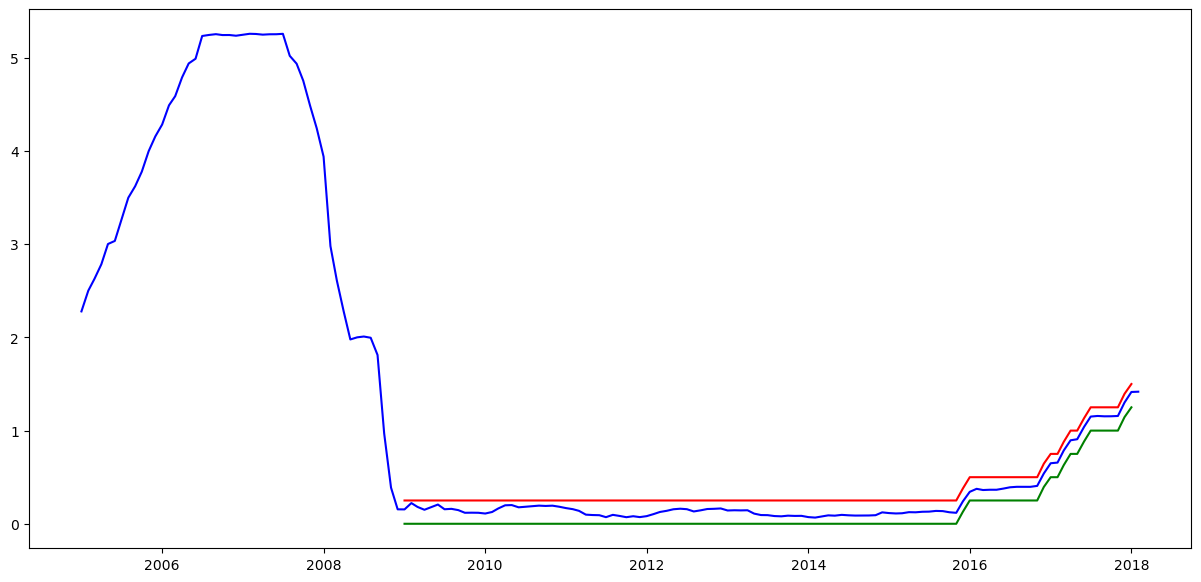

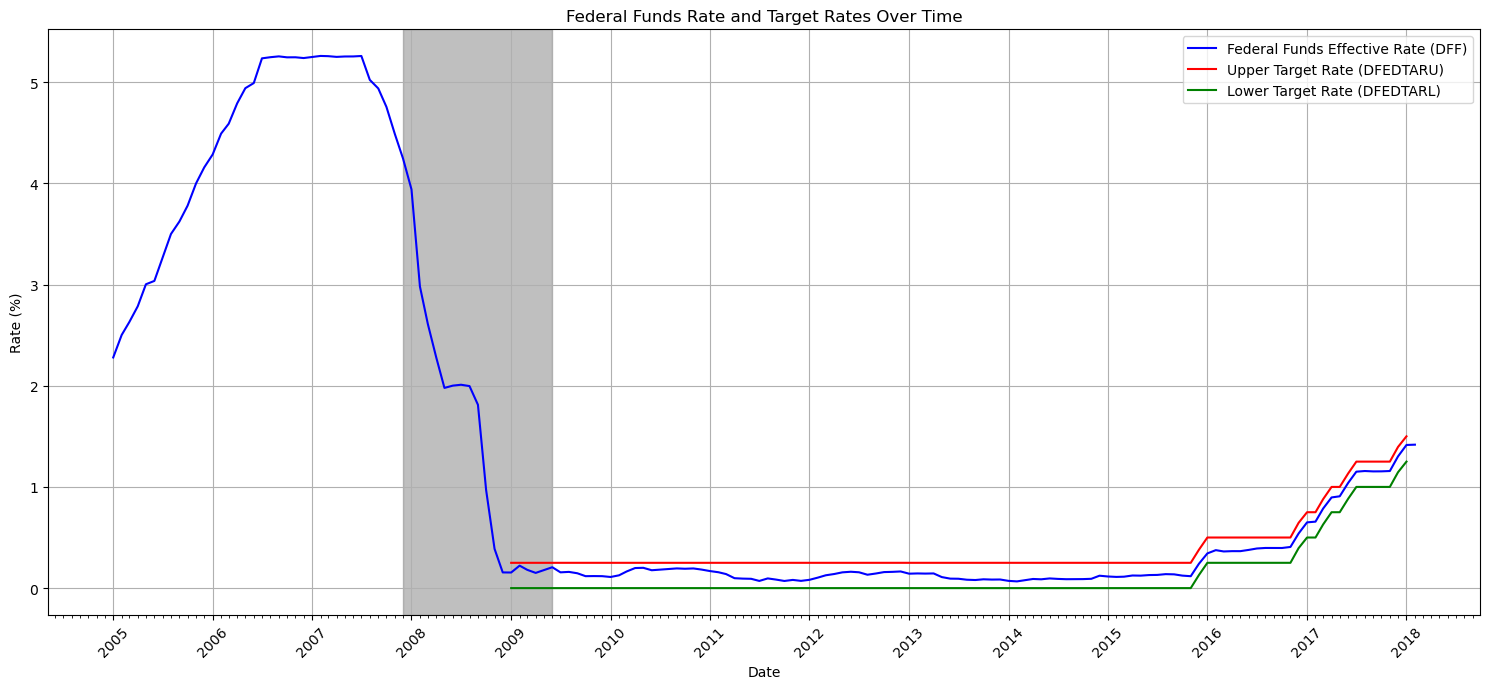

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# 假设 DF_FDD, DF_FUP, DF_Flow 已经正确加载并设置了 'DATE' 作为索引
# 确保所有 DataFrame 使用同一日期索引

# 使用日期作为连接键进行合并
df_merged_FDD = DF_FDD.merge(DF_FUP, left_index=True, right_index=True, how='outer').merge(DF_FLow, left_index=True, right_index=True, how='outer')

# 现在 df_merged 包含了所有的数据，您可以直接绘制它
plt.figure(figsize=(15, 7))
plt.plot(df_merged_FDD.index, df_merged_FDD['DFF'], label='Federal Funds Effective Rate', color='blue')
plt.plot(df_merged_FDD.index, df_merged_FDD['DFEDTARU'], label='Upper Target Rate', color='red')
plt.plot(df_merged_FDD.index, df_merged_FDD['DFEDTARL'], label='Lower Target Rate', color='green')

# 创建图表
plt.figure(figsize=(15, 7))
plt.plot(DF_FDD.index, DF_FDD['DFF'], label='Federal Funds Effective Rate (DFF)', color='blue')
plt.plot(DF_FUP.index, DF_FUP['DFEDTARU'], label='Upper Target Rate (DFEDTARU)', color='red')
plt.plot(DF_FLow.index, DF_FLow['DFEDTARL'], label='Lower Target Rate (DFEDTARL)', color='green')

# 添加经济衰退期的阴影
recessions = [
    (pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01')),
    # 根据需要添加更多衰退期
]
for start, end in recessions:
    plt.axvspan(start, end, color='grey', alpha=0.5)

# 设置日期格式
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 设置标签和标题
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('Federal Funds Rate and Target Rates Over Time')
plt.legend()

# 显示网格
plt.grid(True)

# 旋转日期标签以改善可读性
plt.xticks(rotation=45)

# 显示图表
plt.tight_layout()
plt.show()


In [36]:
DFAAA = pd.read_csv('MbofaAAA.csv')
print(DFAAA)
print(DFAAA.columns)
DFBBB = pd.read_csv('BAMLC0A4CBBBEY.csv')
print(DFBBB)
print(DFBBB.columns)


           DATE  BAMLC0A1CAAAEY
0    2005-02-01        4.380500
1    2005-03-01        4.701818
2    2005-04-01        4.689545
3    2005-05-01        4.588182
4    2005-06-01        4.485909
..          ...             ...
116  2014-10-01        2.525217
117  2014-11-01        2.563333
118  2014-12-01        2.511364
119  2015-01-01        2.258571
120  2015-02-01        2.331905

[121 rows x 2 columns]
Index(['DATE', 'BAMLC0A1CAAAEY'], dtype='object')
          DATE  BAMLC0A4CBBBEY
0   2005-02-01        5.109500
1   2005-03-01        5.502273
2   2005-04-01        5.646818
3   2005-05-01        5.645455
4   2005-06-01        5.259091
..         ...             ...
92  2012-10-01        3.388636
93  2012-11-01        3.350909
94  2012-12-01        3.354000
95  2013-01-01        3.324545
96  2013-02-01        3.407000

[97 rows x 2 columns]
Index(['DATE', 'BAMLC0A4CBBBEY'], dtype='object')


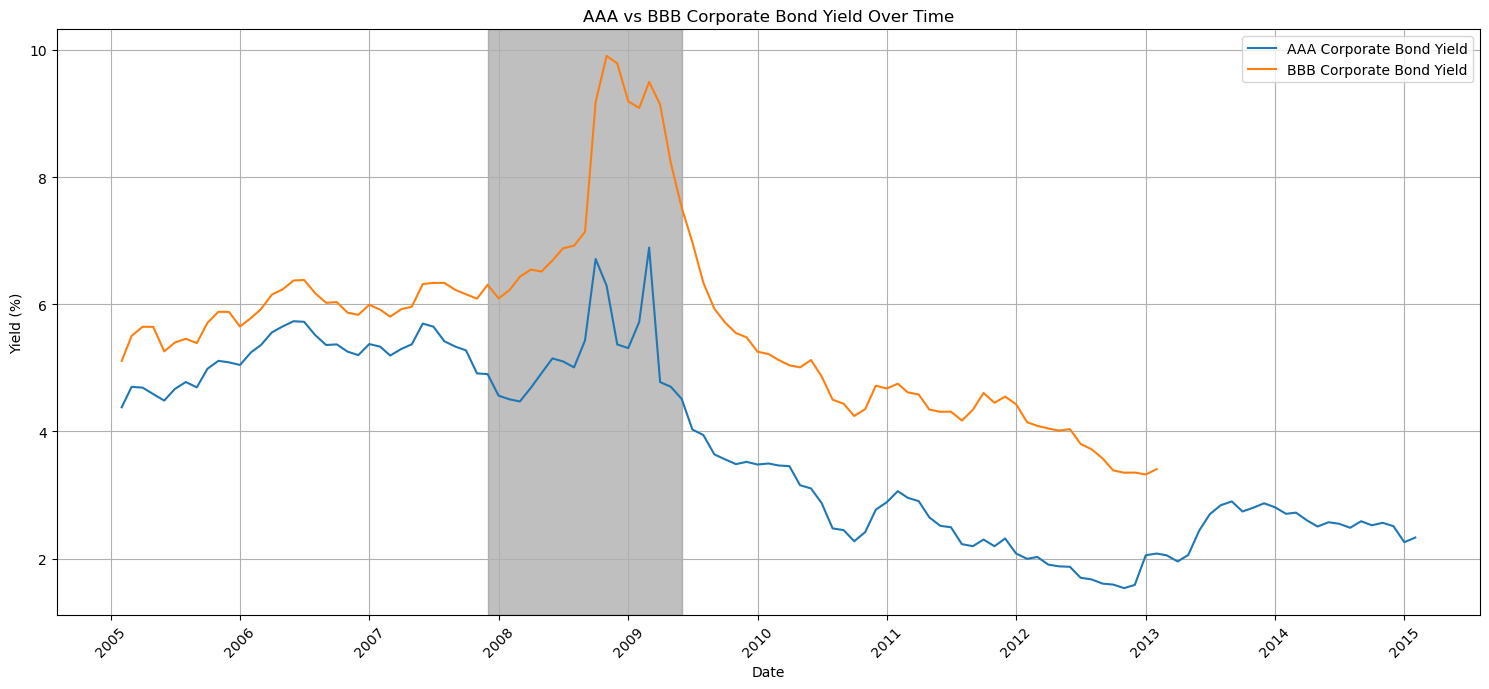

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# 读取数据
DFAAA = pd.read_csv('MbofaAAA.csv')
DFBBB = pd.read_csv('BAMLC0A4CBBBEY.csv')

# 将日期列转换为 datetime 对象
DFAAA['DATE'] = pd.to_datetime(DFAAA['DATE'])
DFBBB['DATE'] = pd.to_datetime(DFBBB['DATE'])

# 创建图表
plt.figure(figsize=(15, 7))

# 绘制每个数据集
plt.plot(DFAAA['DATE'], DFAAA['BAMLC0A1CAAAEY'], label='AAA Corporate Bond Yield')
plt.plot(DFBBB['DATE'], DFBBB['BAMLC0A4CBBBEY'], label='BBB Corporate Bond Yield')


# 设置日期格式化器和定位器
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

recessions = [
    (pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01')),
    # ... 添加更多衰退期
]
for start, end in recessions:
    plt.axvspan(start, end, color='grey', alpha=0.5)
    
# 设置轴标签和标题
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.title('AAA vs BBB Corporate Bond Yield Over Time')
plt.legend()

# 显示网格
plt.grid(True)

# 旋转日期标签以便于阅读
plt.xticks(rotation=45)

# 应用紧凑布局
plt.tight_layout()

# 显示图表
plt.show()



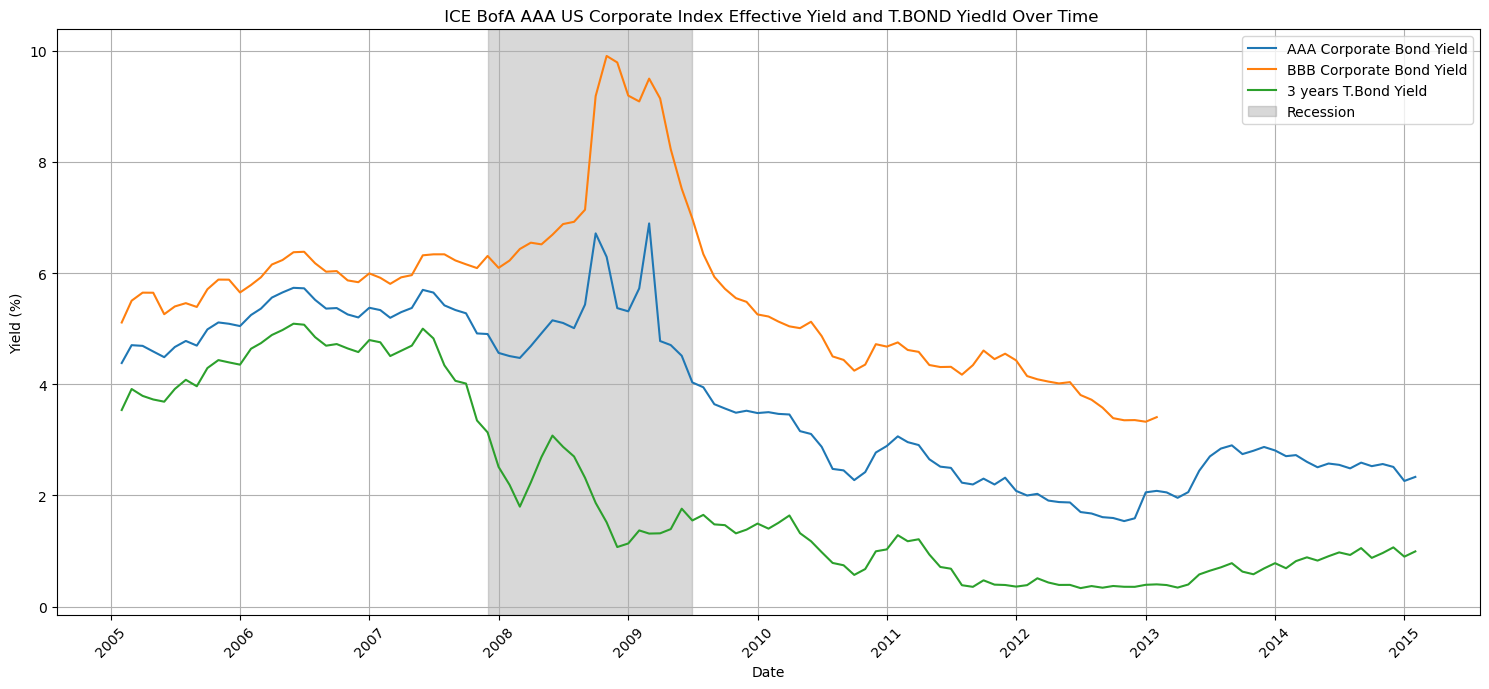

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
DF_TBOND = pd.read_csv('T.Bond.csv')
# 确保 'DATE' 列没有被设置为索引
# 如果已经设置为索引，需要重新设置为普通列
if 'DATE' not in df_fedfund.columns:
    df_fedfund.reset_index(inplace=True)

df_fedfund['DATE'] = pd.to_datetime(df_fedfund['DATE'])
DFAAA['DATE'] = pd.to_datetime(DFAAA['DATE'])
DFBBB['DATE'] = pd.to_datetime(DFBBB['DATE'])
DF_TBOND['DATE'] = pd.to_datetime(DF_TBOND['DATE'])
# 合并数据集
combined_df = pd.merge(pd.merge(DFAAA, DFBBB, on='DATE', how='outer'), df_fedfund, on='DATE', how='outer')

# 绘制图表
plt.figure(figsize=(15, 7))
plt.plot(combined_df['DATE'], combined_df['BAMLC0A1CAAAEY'], label='AAA Corporate Bond Yield')
plt.plot(combined_df['DATE'], combined_df['BAMLC0A4CBBBEY'], label='BBB Corporate Bond Yield')
plt.plot(DF_TBOND['DATE'], DF_TBOND['DGS3'], label='3 years T.Bond Yield')

# 标记经济衰退期
recession_start = pd.to_datetime('2007-12-01')
recession_end = pd.to_datetime('2009-06-30')
plt.axvspan(recession_start, recession_end, color='grey', alpha=0.3, label='Recession')

# 设置日期格式化器和定位器
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


# 设置轴标签和标题
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.title(' ICE BofA AAA US Corporate Index Effective Yield and T.BOND Yiedld Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# 读取数据
DFModdyAAA = pd.read_csv('MoodyAAA1.csv')
print(DFModdyAAA.head())
print(DFModdyAAA.columns)
DFModdyAAA.shape

         DATE   AAA
0  2003-01-01  6.17
1  2003-02-01  5.95
2  2003-03-01  5.89
3  2003-04-01  5.74
4  2003-05-01  5.22
Index(['DATE', 'AAA'], dtype='object')


(133, 2)

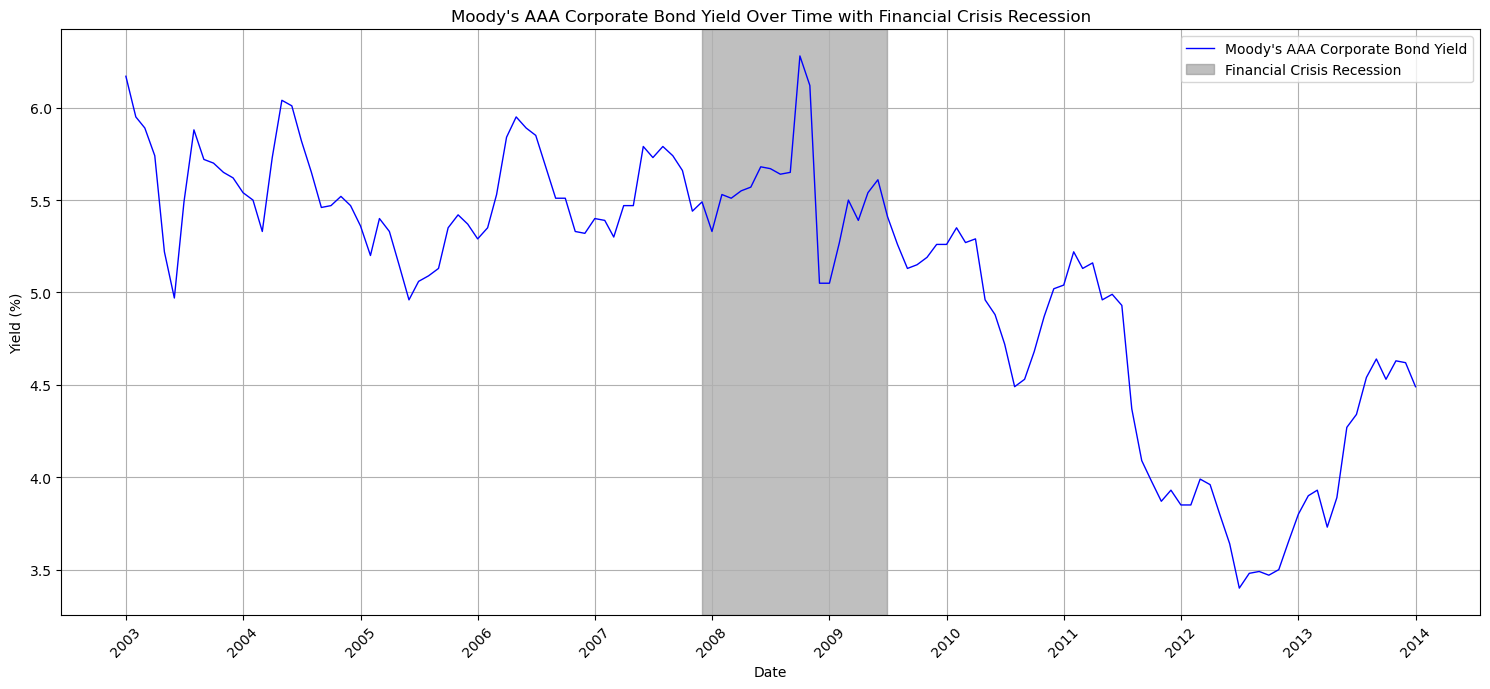

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# 确保 'DATE' 列是 datetime 类型
DFModdyAAA['DATE'] = pd.to_datetime(DFModdyAAA['DATE'])

# 绘制时间序列图
plt.figure(figsize=(15, 7))  # 设定图表大小
plt.plot(DFModdyAAA['DATE'], DFModdyAAA['AAA'], label="Moody's AAA Corporate Bond Yield", color='blue', linewidth=1)

# 标记金融危机期间的经济衰退
plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-30'), color='grey', alpha=0.5, label='Financial Crisis Recession')

# 设置日期格式化器和定位器，以年为单位展示时间
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # 主要刻度间隔设为每年

# 设置轴标签和图表标题
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.title("Moody's AAA Corporate Bond Yield Over Time with Financial Crisis Recession")

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 旋转日期标签以便于阅读
plt.xticks(rotation=45)

# 应用紧凑布局
plt.tight_layout()

# 显示图表
plt.show()


In [57]:
import pandas as pd 
DF_loan = pd.read_csv('banklending.csv')
print(DF_loan.head())
print(DF_loan.columns)
DF_loan.shape


         DATE  BUSLOANS
0  2005-01-01  921.5217
1  2005-02-01  931.8983
2  2005-03-01  945.8926
3  2005-04-01  958.5639
4  2005-05-01  968.7372
Index(['DATE', 'BUSLOANS'], dtype='object')


(157, 2)

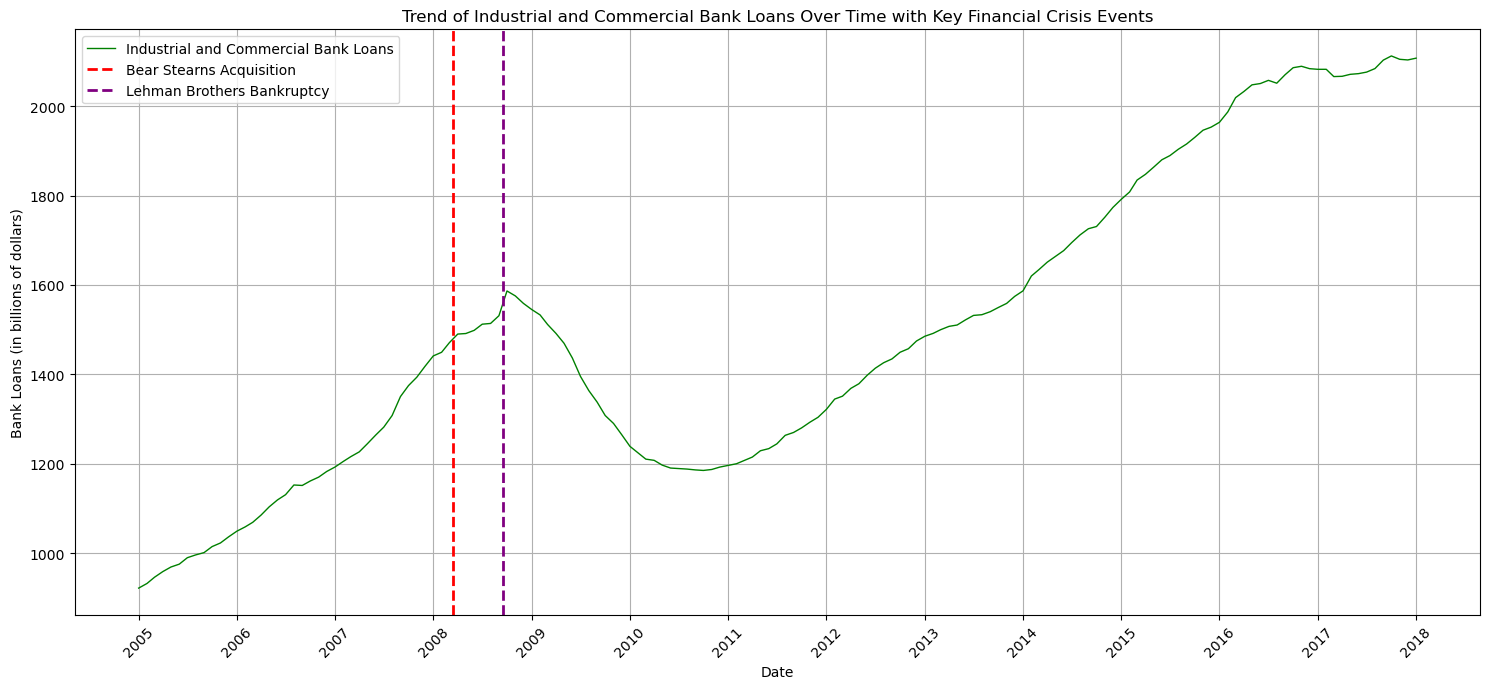

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# 假设数据已经加载到 DataFrame 中，且列名正确
# 确保 'DATE' 列是 datetime 类型
DF_loan['DATE'] = pd.to_datetime(DF_loan['DATE'])

# 绘制时间序列图
plt.figure(figsize=(15, 7))  # 设定图表大小
plt.plot(DF_loan['DATE'], DF_loan['BUSLOANS'], label='Industrial and Commercial Bank Loans', color='green', linewidth=1)

# 标记金融危机重要事件
plt.axvline(pd.to_datetime('2008-03-16'), color='red', linestyle='--', lw=2, label='Bear Stearns Acquisition')
plt.axvline(pd.to_datetime('2008-09-15'), color='purple', linestyle='--', lw=2, label='Lehman Brothers Bankruptcy')

# 可以添加美联储的关键调整时间点，这里只是示例
# plt.axvline(pd.to_datetime('特定日期'), color='色彩', linestyle='--', lw=2, label='事件描述')

# 设置日期格式化器和定位器，以年为单位展示时间
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # 主要刻度间隔设为每年
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 主要刻度格式设为年份

# 设置轴标签和图表标题
plt.xlabel('Date')
plt.ylabel('Bank Loans (in billions of dollars)')
plt.title('Trend of Industrial and Commercial Bank Loans Over Time with Key Financial Crisis Events')

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 旋转日期标签以便于阅读
plt.xticks(rotation=45)

# 应用紧凑布局
plt.tight_layout()

# 显示图表
plt.show()


In [25]:
df_VIX = pd.read_excel('VIX INDEX.xlsx')
print(df_VIX)

           Date  VIX INDEX
0    2015-12-29      16.08
1    2015-12-28      16.91
2    2015-12-24      15.74
3    2015-12-23      15.57
4    2015-12-22      16.60
...         ...        ...
2777 2004-12-16      12.27
2778 2004-12-15      12.35
2779 2004-12-14      12.73
2780 2004-12-13      12.54
2781 2004-12-10      12.76

[2782 rows x 2 columns]


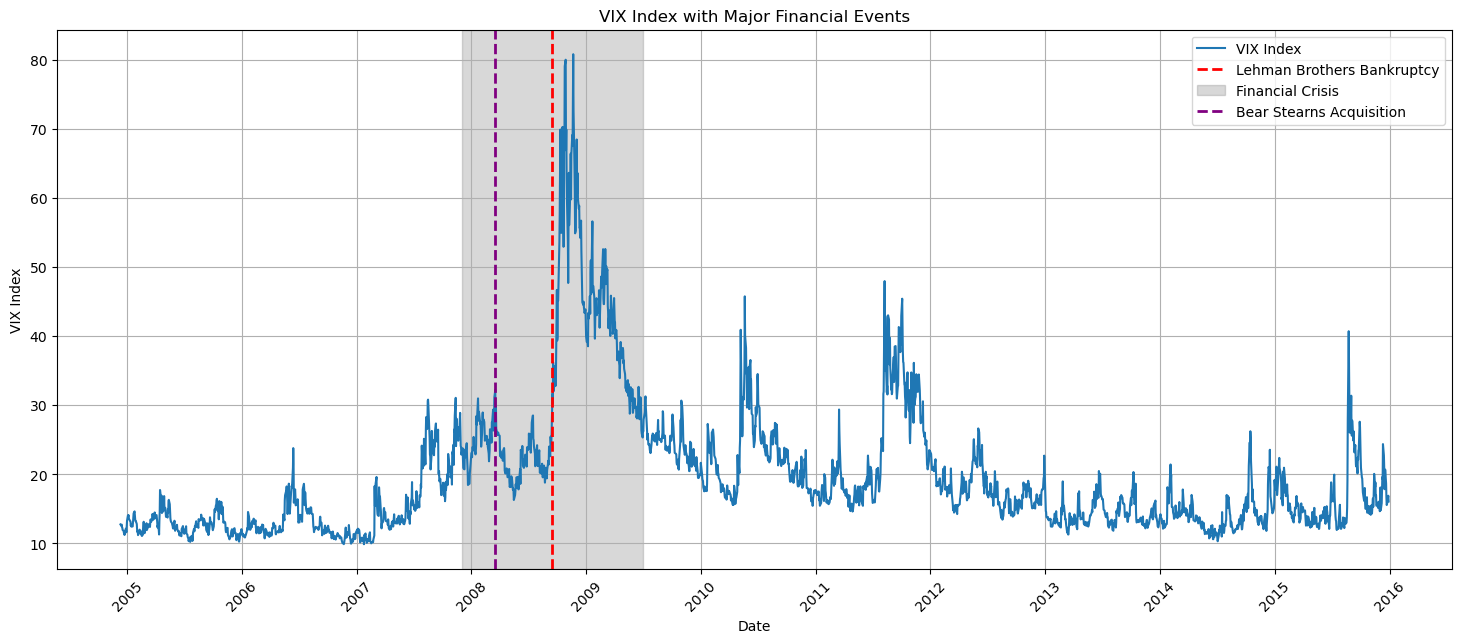

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 假设你已经加载了DataFrame df_VIX
# 转换日期列为 datetime 类型
df_VIX['Date'] = pd.to_datetime(df_VIX['Date'])

# 对数据按日期排序
df_VIX.sort_values('Date', inplace=True)

# 绘图
plt.figure(figsize=(18, 7))
plt.plot(df_VIX['Date'], df_VIX['VIX INDEX'], label='VIX Index')

# 标记重大事件
# 雷曼兄弟破产日 2008-09-15
plt.axvline(pd.to_datetime('2008-09-15'), color='r', linestyle='--', lw=2, label='Lehman Brothers Bankruptcy')

# 金融危机阴影区域
plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-30'), color='grey', alpha=0.3, label='Financial Crisis')

# 标记其他重大事件，根据具体日期调整
# 例如，梅林收购和摩根大通的事件，您需要提供具体日期
plt.axvline(pd.to_datetime('2008-03-16'), color='purple', linestyle='--', lw=2, label='Bear Stearns Acquisition')

# 金融危机阴影区域
# 设置图例和标签
plt.legend()
plt.xlabel('Date')
plt.ylabel('VIX Index')
plt.title('VIX Index with Major Financial Events')
plt.xticks(rotation=45)

# 显示网格
plt.grid(True)

# 优化日期显示
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 显示图表
plt.show()


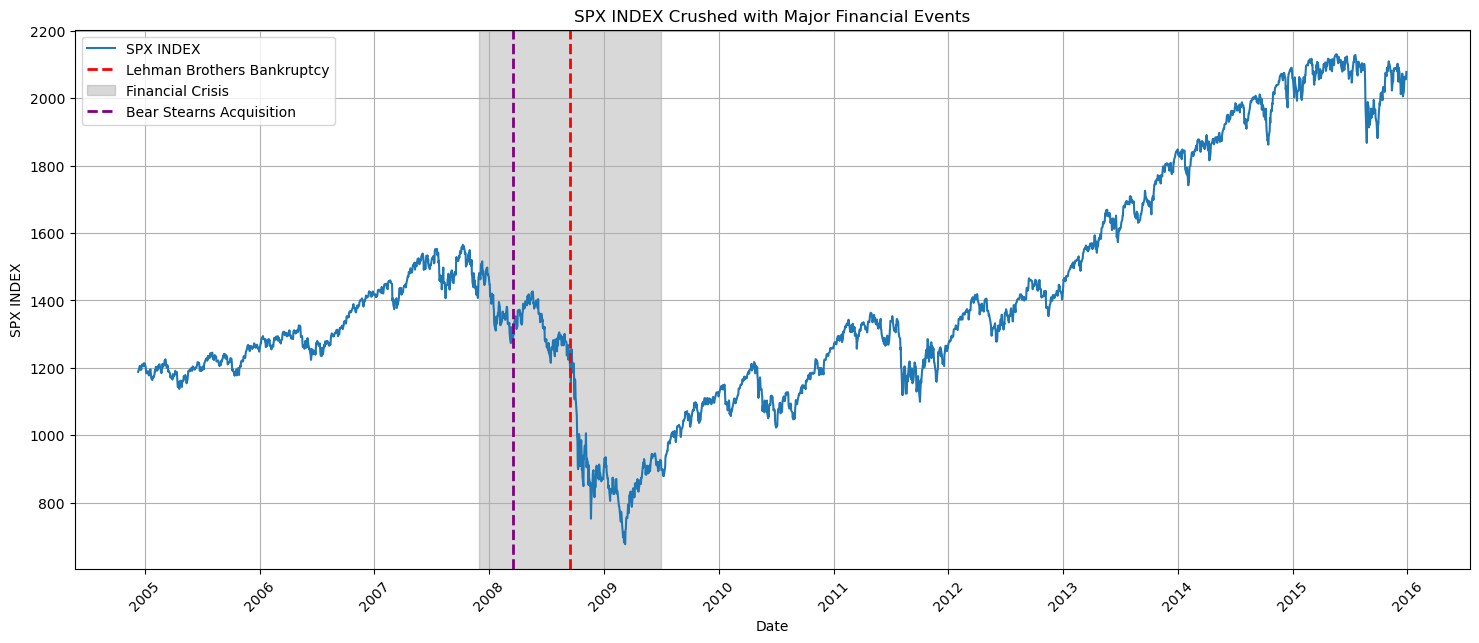

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
DF_SP500 = pd.read_excel('SP500.xlsx')
# 假设你已经加载了DataFrame df_VIX
# 转换日期列为 datetime 类型
DF_SP500['Date'] = pd.to_datetime(DF_SP500['Date'])

# 对数据按日期排序
DF_SP500.sort_values('Date', inplace=True)

# 绘图
plt.figure(figsize=(18, 7))
plt.plot(DF_SP500['Date'], DF_SP500['Last Price'], label='SPX INDEX')

# 标记重大事件
# 雷曼兄弟破产日 2008-09-15
plt.axvline(pd.to_datetime('2008-09-15'), color='r', linestyle='--', lw=2, label='Lehman Brothers Bankruptcy')

# 金融危机阴影区域
plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-30'), color='grey', alpha=0.3, label='Financial Crisis')

# 标记其他重大事件，根据具体日期调整
# 例如，梅林收购和摩根大通的事件，您需要提供具体日期
plt.axvline(pd.to_datetime('2008-03-16'), color='purple', linestyle='--', lw=2, label='Bear Stearns Acquisition')

# 金融危机阴影区域
# 设置图例和标签
plt.legend()
plt.xlabel('Date')
plt.ylabel('SPX INDEX')
plt.title('SPX INDEX Crushed with Major Financial Events')
plt.xticks(rotation=45)

# 显示网格
plt.grid(True)

# 优化日期显示
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 显示图表
plt.show()